# King County House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### EDA - Exploratory Data Analysis

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

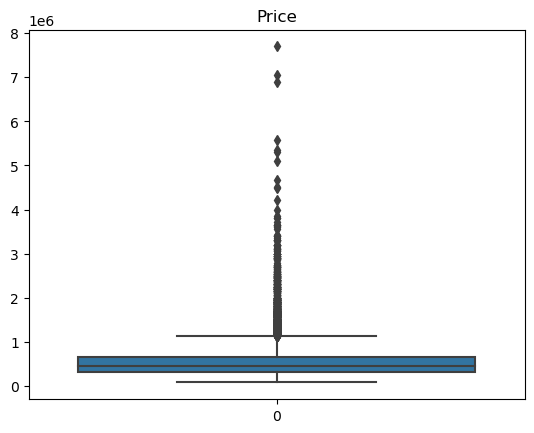

In [7]:
sns.boxplot(df["price"])
plt.title("Price");

Text(0.5, 1.0, 'Bedrooms')

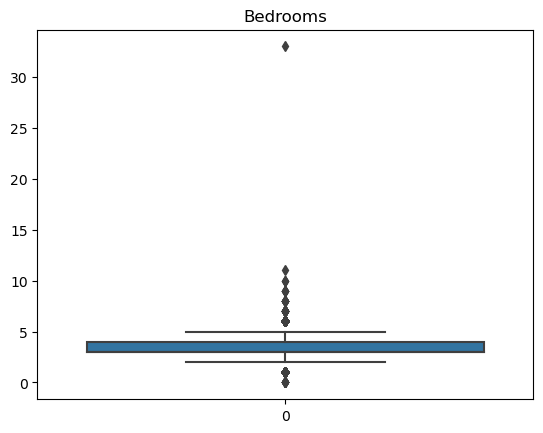

In [8]:
sns.boxplot(df["bedrooms"])
plt.title("Bedrooms")

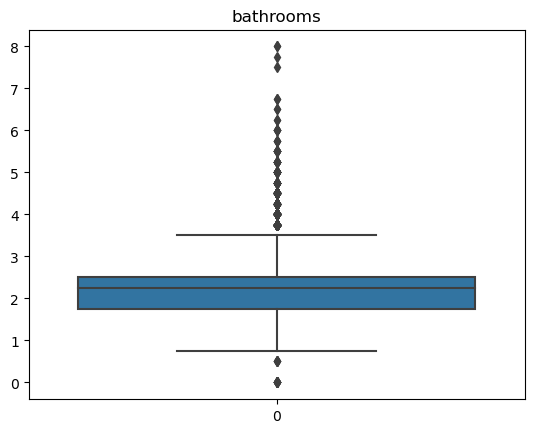

In [9]:
sns.boxplot(df["bathrooms"])
plt.title("bathrooms");

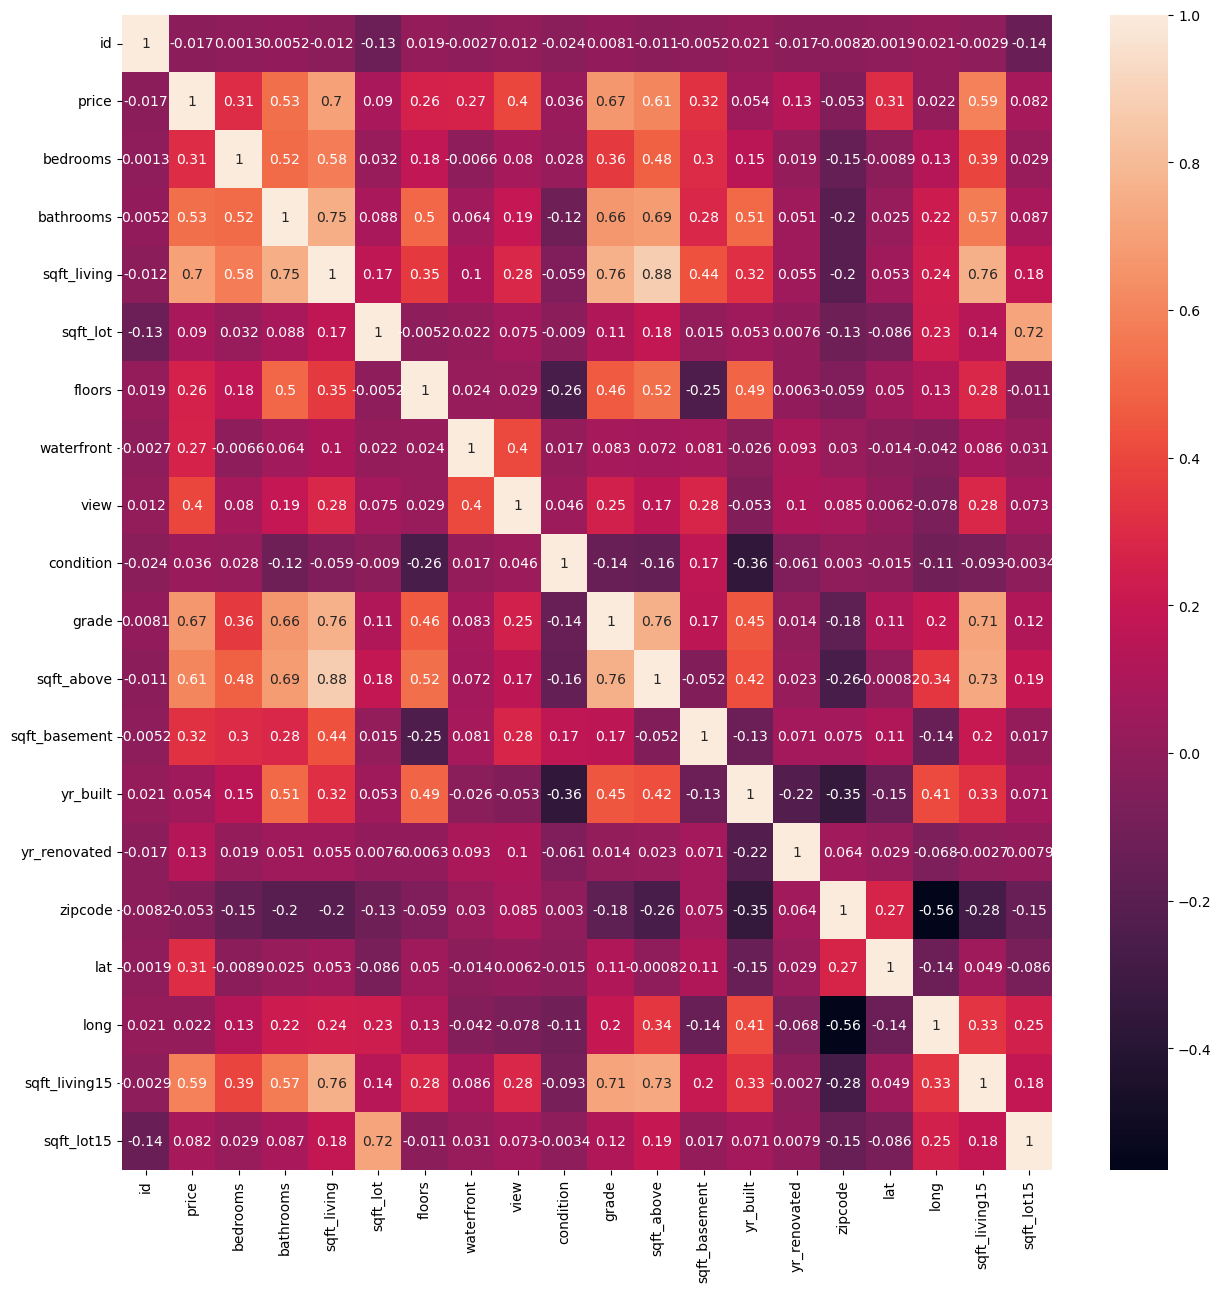

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

### Feature Engineering

In [11]:
# drop id column
df=df.drop("id",axis=1)

In [12]:
df["zipcode"]=df["zipcode"].astype("category")

In [13]:
# Converting date to hold year+month
df["date"]=df["date"].str[:8]
# Creating new columns for yr and mnth
df["purchase_yr"]=df["date"].str[:4].astype(int)
df["purchase_mn"]=df["date"].str[4:6].astype(int)
df["age"]=2022-df["yr_built"]

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,purchase_yr,purchase_mn,age
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,67
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,71
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,89
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,57
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,35


In [15]:
# Creating columns for basement and renovated status (1/0)
df["basement"]=(df["sqft_basement"]>0).astype(int)
df["renovated"]=(df["yr_renovated"]>0).astype(int)

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,purchase_yr,purchase_mn,age,basement,renovated
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,2014,10,67,0,0
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,2014,12,71,1,1
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,2015,2,89,0,0
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014,12,57,1,0
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,2015,2,35,0,0


In [17]:
# Normalizing grade and condition columns to create a newgrade column
df["condition"]=df["condition"]/df["condition"].max()
df["grade"]=df["grade"]/df["grade"].max()

# Experiment with priority to condition and grade for a combined metrics 
df["newgrade"]=df["condition"]*0.6 + df["grade"]*0.4

In [18]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,purchase_yr,purchase_mn,age,basement,renovated,newgrade
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,0.6,...,47.5112,-122.257,1340,5650,2014,10,67,0,0,0.575385
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,0.6,...,47.7210,-122.319,1690,7639,2014,12,71,1,1,0.575385
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,0.6,...,47.7379,-122.233,2720,8062,2015,2,89,0,0,0.544615
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,1.0,...,47.5208,-122.393,1360,5000,2014,12,57,1,0,0.815385
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,0.6,...,47.6168,-122.045,1800,7503,2015,2,35,0,0,0.606154


In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,purchase_yr,purchase_mn,age,basement,renovated,newgrade
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,0.681886,0.588990,...,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,50.994864,0.392680,0.042289,0.644728
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.130149,0.090420,...,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,29.373411,0.488358,0.201253,0.081172
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,0.200000,0.076923,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,7.000000,0.000000,0.000000,0.150769
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,0.600000,0.538462,...,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,25.000000,0.000000,0.000000,0.575385
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,0.600000,0.538462,...,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,47.000000,0.000000,0.000000,0.606154
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,0.800000,0.615385,...,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,71.000000,1.000000,0.000000,0.695385
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,1.000000,1.000000,...,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,122.000000,1.000000,1.000000,0.969231


#### Removing Outliers

In [20]:
outliers=df.quantile(0.97)
df=df[(df["price"]<outliers["price"])]
df=df[(df["bedrooms"]<outliers["bedrooms"])]
df=df[(df["bathrooms"]<outliers["bathrooms"])]

In [21]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,purchase_yr,purchase_mn,age,basement,renovated,newgrade
count,1.860500e+04,18605.000000,18605.000000,18605.000000,1.860500e+04,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,...,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000
mean,4.709407e+05,3.156517,1.960615,1885.121634,1.415996e+04,1.460709,0.003977,0.172427,0.682311,0.575829,...,47.556195,-122.215520,1888.990218,12247.673529,2014.322978,6.578930,51.987584,0.356678,0.037194,0.639719
std,2.183862e+05,0.707115,0.631466,708.574882,3.791961e+04,0.538522,0.062943,0.647044,0.130194,0.078825,...,0.142103,0.142505,594.143811,25375.420501,0.467627,3.114383,29.059922,0.479032,0.189243,0.079681
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,0.200000,0.076923,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,7.000000,0.000000,0.000000,0.150769
25%,3.080000e+05,3.000000,1.500000,1360.000000,5.000000e+03,1.000000,0.000000,0.000000,0.600000,0.538462,...,47.456800,-122.332000,1450.000000,5018.000000,2014.000000,4.000000,28.000000,0.000000,0.000000,0.575385
50%,4.250000e+05,3.000000,2.000000,1790.000000,7.480000e+03,1.000000,0.000000,0.000000,0.600000,0.538462,...,47.567100,-122.238000,1770.000000,7500.000000,2014.000000,6.000000,49.000000,0.000000,0.000000,0.606154
75%,5.850000e+05,4.000000,2.500000,2320.000000,1.021500e+04,2.000000,0.000000,0.000000,0.800000,0.615385,...,47.680100,-122.125000,2240.000000,9800.000000,2015.000000,9.000000,72.000000,1.000000,0.000000,0.695385
max,1.387800e+06,4.000000,3.250000,5940.000000,1.651359e+06,3.500000,1.000000,4.000000,1.000000,0.923077,...,47.777600,-121.315000,5790.000000,560617.000000,2015.000000,12.000000,122.000000,1.000000,1.000000,0.907692


In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,purchase_yr,purchase_mn,age,basement,renovated,newgrade
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,0.6,...,47.5112,-122.257,1340,5650,2014,10,67,0,0,0.575385
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,0.6,...,47.7210,-122.319,1690,7639,2014,12,71,1,1,0.575385
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,0.6,...,47.7379,-122.233,2720,8062,2015,2,89,0,0,0.544615
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,1.0,...,47.5208,-122.393,1360,5000,2014,12,57,1,0,0.815385
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,0.6,...,47.6168,-122.045,1800,7503,2015,2,35,0,0,0.606154


In [23]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'purchase_yr', 'purchase_mn', 'age',
       'basement', 'renovated', 'newgrade'],
      dtype='object')

### Modelling

In [24]:
x=df.drop("price",axis=1)
x=pd.get_dummies(x,drop_first=True)
y=df[["price"]]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

#### Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
l=LinearRegression()
model=l.fit(x_train,y_train)
predl=l.predict(x_test)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error

In [29]:
r2_score(y_test,predl)

-1576.1191707190906

In [30]:
mean_squared_error(y_test,predl)**0.5

8835339.846591115

#### Ridge,Lasso Models

In [31]:
from sklearn.linear_model import Ridge,Lasso

In [32]:
R=Ridge()
R.fit(x_train,y_train)
predR=R.predict(x_test)

In [33]:
r2_score(y_test,predR)

0.8289143919396733

In [34]:
mean_squared_error(y_test,predR)**0.5

92023.2871298188

In [35]:
L=Lasso()
L.fit(x_train,y_train)
predL=L.predict(x_test)

In [36]:
r2_score(y_test,predL)

0.8301744643762478

In [37]:
mean_squared_error(y_test,predL)**0.5

91683.77784141286

#### Extra Gradient Booster Model

In [38]:
from xgboost import XGBRegressor

In [39]:
xgb=XGBRegressor()
model=xgb.fit(x_train,y_train)

In [40]:
predxgb=xgb.predict(x_test)

In [41]:
mean_squared_error(y_test,predxgb)**0.5

79581.86288440891

In [42]:
r2_score(y_test,predxgb)

0.8720482603906182

#### Using function to check other models score

In [45]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBoosting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [46]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBoosting,0.872048,7.958186e+04,53013.187804
Gradient Boosting,0.842286,8.835395e+04,61222.357508
Lasso,0.830174,9.168378e+04,65381.105319
Ridge,0.828914,9.202329e+04,65625.004879
Extra Tree,0.730712,1.154514e+05,76427.467079
ElasticNet,0.496642,1.578445e+05,121959.992385
Linear,-1576.119171,8.835340e+06,315218.633583


### From the table: XGB is the best model